## Load the matplotlib magic and the normal pandas stack

In [236]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
import re

## Read the data into a dict of dicts

In [254]:
outputFiles = os.listdir('../output')
output = dict()
for outputFile in outputFiles:
    with open("../output/" + outputFile, 'r') as f:
        output[outputFile] = dict()
        for cnt, line in enumerate(f):
            split = line.split()
            if len(split) > 1:
                output[outputFile][split[0]] = pd.Series(split[1:])
            
print output.keys()


['cashier_1000_20.output', 'cashier_1000_14.output', 'cashier_1000_28.output', 'cashier_1000_22.output', 'cashier_1000_6.output', 'cashier_1000_24.output']


## Great, lets take a look at the data! We'll look at the 1000 customer / 6 cashier scenario and create a histogram of the customer shop times.

count    1000.000000
mean        9.917924
std         8.196604
min         1.001600
25%         4.907825
50%         7.785950
75%        12.341375
max        96.247300
dtype: float64

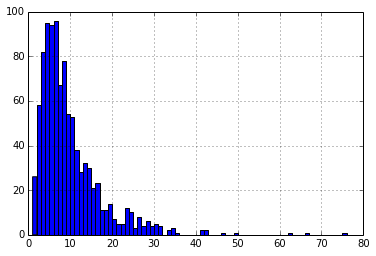

In [255]:
shopTimes = output['cashier_1000_6.output']['OUT_CUSTOMER_SHOP_TIMES_0'].astype(float)
count, division = np.histogram(shopTimes, range(int(shopTimes.min()),int(shopTimes.max()),1))
shopTimes.hist(bins=division)
shopTimes.describe()

## We can see it is a lognormal distribution, with a mean of around 10 minutes and a standard deviation of ~8 minutes. That matches up with our input.

## Lets take a look at entry times.

count    1000.000000
mean      121.656864
std        59.894391
min        21.881600
25%        77.513250
50%       110.260750
75%       152.053325
max       469.771400
dtype: float64

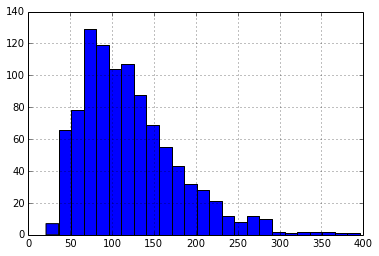

In [256]:
entryTimes = output['cashier_1000_6.output']['OUT_CUSTOMER_ENTRY_TIMES_0'].astype(float)
count, division = np.histogram(entryTimes, range(int(entryTimes.min()),int(entryTimes.max()),15))
entryTimes.hist(bins=division)
entryTimes.describe()

## Again, a lognormal distribution. A mean of 120 minutes with a standard deviation of ~ an hour. So far, so good.

## Lets take a look at the customer wait times

count    1000.000000
mean      151.151596
std        87.246451
min         0.000000
25%        72.578800
50%       161.619200
75%       233.683975
max       267.606900
dtype: float64

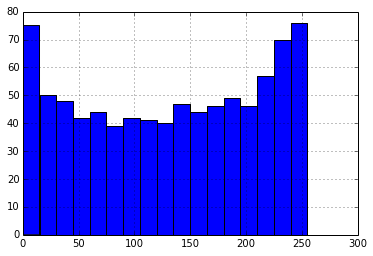

In [257]:
waitTimes = output['cashier_1000_6.output']['OUT_CUSTOMER_WAIT_TIMES_0'].astype(float)
count, division = np.histogram(waitTimes, range(int(waitTimes.min()), int(waitTimes.max()), 15))
waitTimes.hist(bins=division)
waitTimes.describe()

## Wow, look at those wait times. A mean wait time of over 2.5 hours. Thats not very realistic; lets take a look at a scenario with more cashiers.

count    1000.000000
mean       42.662295
std        27.483663
min         0.000000
25%        15.560400
50%        48.156300
75%        68.640850
max        78.487200
dtype: float64

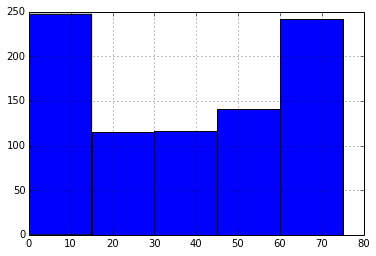

In [260]:
waitTimes_14 = output['cashier_1000_14.output']['OUT_CUSTOMER_WAIT_TIMES_0'].astype(float)
count, division = np.histogram(waitTimes_14, range(int(waitTimes_14.min()),int(waitTimes_14.max()),15))
waitTimes_14.hist(bins=division)
waitTimes_14.describe()

## Thats a little bit better, but still unreasonable. Over 200 or so people waiting in line for 60-75 minutes? Lets add more cashiers.

count    1000.000000
mean        2.750021
std         2.906442
min         0.000000
25%         0.000000
50%         1.564400
75%         5.866500
max         8.066000
dtype: float64

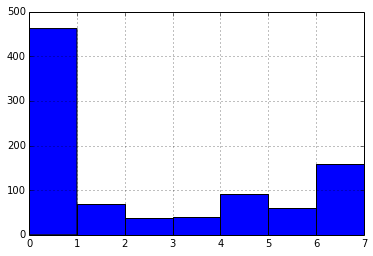

In [261]:
waitTimes_22 = output['cashier_1000_22.output']['OUT_CUSTOMER_WAIT_TIMES_0'].astype(float)
count, division = np.histogram(waitTimes_22, range(int(waitTimes_22.min()),int(waitTimes_22.max()),1))
waitTimes_22.hist(bins=division)
waitTimes_22.describe()

## Thats much better. A max wait time of 8 minutes, and 75% of customers have a wait time of < 6 minutes. Remember though, these are based off of single runs. Lets run multiples in the next notebook.